# Exercício 3 - FAV Enunciado Análise de Dados

**Importação de módulos**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd

**Carregamento do ficheiro de dados**

In [11]:
filename_data_source = 'data/ecommerce_customers.csv'
df = pd.read_csv(filename_data_source)

**Primeira análise dos dados**

In [12]:
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [13]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
df.shape
# (500, 8)

(500, 8)

In [15]:
# Verificar o tipo de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [16]:
# Ver a percentagem de valores em falta por coluna
df.isnull().mean().sort_values(ascending=False) * 100

Email                   0.0
Address                 0.0
Avatar                  0.0
Avg. Session Length     0.0
Time on App             0.0
Time on Website         0.0
Length of Membership    0.0
Yearly Amount Spent     0.0
dtype: float64

***

📌 Parte 1: Limpeza e Tratamento de Dados

In [17]:
# Remover colunas não necessárias para análise estatística:
df = df.drop(columns=['Email', 'Address', 'Avatar'])

In [19]:
# Renomear colunas para facilitar o uso
df.columns = ['AvgSessionLength', 'TimeOnApp', 'TimeOnWebsite', 'MembershipLength', 'YearlySpent']

In [22]:
# Verificar duplicados
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)

***

# Processamento de Dados

In [23]:
# 1. Criar categorias de clientes com base no valor anual gasto
# Dividimos os clientes em três grupos: Baixo, Médio e Alto gasto
df['SpendingCategory'] = pd.qcut(df['YearlySpent'], q=3, labels=['Baixo', 'Médio', 'Alto'])

In [24]:
# 2. Calcular a correlação entre variáveis numéricas
correlation_matrix = df.corr(numeric_only=True)
print("Matriz de correlação:")
print(correlation_matrix)

Matriz de correlação:
                  AvgSessionLength  TimeOnApp  TimeOnWebsite  \
AvgSessionLength          1.000000  -0.027826      -0.034987   
TimeOnApp                -0.027826   1.000000       0.082388   
TimeOnWebsite            -0.034987   0.082388       1.000000   
MembershipLength          0.060247   0.029143      -0.047582   
YearlySpent               0.355088   0.499328      -0.002641   

                  MembershipLength  YearlySpent  
AvgSessionLength          0.060247     0.355088  
TimeOnApp                 0.029143     0.499328  
TimeOnWebsite            -0.047582    -0.002641  
MembershipLength          1.000000     0.809084  
YearlySpent               0.809084     1.000000  


In [25]:
# 3. Identificar os 10 clientes que mais gastam
top_10_spenders = df.sort_values(by='YearlySpent', ascending=False).head(10)
print("\nTop 10 clientes com maior gasto anual:")
print(top_10_spenders)


Top 10 clientes com maior gasto anual:
     AvgSessionLength  TimeOnApp  TimeOnWebsite  MembershipLength  \
65          34.374258  15.126994      37.157624          5.377594   
157         34.603311  12.207298      33.913847          6.922689   
50          33.256335  13.858062      37.780265          5.976768   
205         34.967610  13.919494      37.952013          5.066697   
368         34.385820  12.729720      36.232110          5.705941   
24          34.507551  12.893670      37.635756          5.705154   
305         33.302672  13.459222      36.339521          5.566385   
464         32.533240  14.121784      38.406329          5.320094   
151         32.887105  12.387184      37.431159          6.401229   
396         35.742670  10.889828      35.565436          6.115199   

     YearlySpent SpendingCategory  
65    765.518462             Alto  
157   744.221867             Alto  
50    725.584814             Alto  
205   712.396327             Alto  
368   708.935185    

In [26]:
# 4. Agrupar por categoria de gasto e calcular médias
media_por_categoria = df.groupby('SpendingCategory').mean(numeric_only=True)
print("\nMédia das variáveis por categoria de gasto:")
print(media_por_categoria)


Média das variáveis por categoria de gasto:
                  AvgSessionLength  TimeOnApp  TimeOnWebsite  \
SpendingCategory                                               
Baixo                    32.706122  11.519099      37.058256   
Médio                    32.969989  12.048540      37.050337   
Alto                     33.482972  12.589801      37.072683   

                  MembershipLength  YearlySpent  
SpendingCategory                                 
Baixo                     2.652137   414.160756  
Médio                     3.572811   499.791165  
Alto                      4.375672   583.993050  


C:\Users\jpedr\AppData\Local\Temp\ipykernel_26012\2094282639.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_categoria = df.groupby('SpendingCategory').mean(numeric_only=True)


***

# Visualização de Dados

Distribuição do valor gasto anualmente

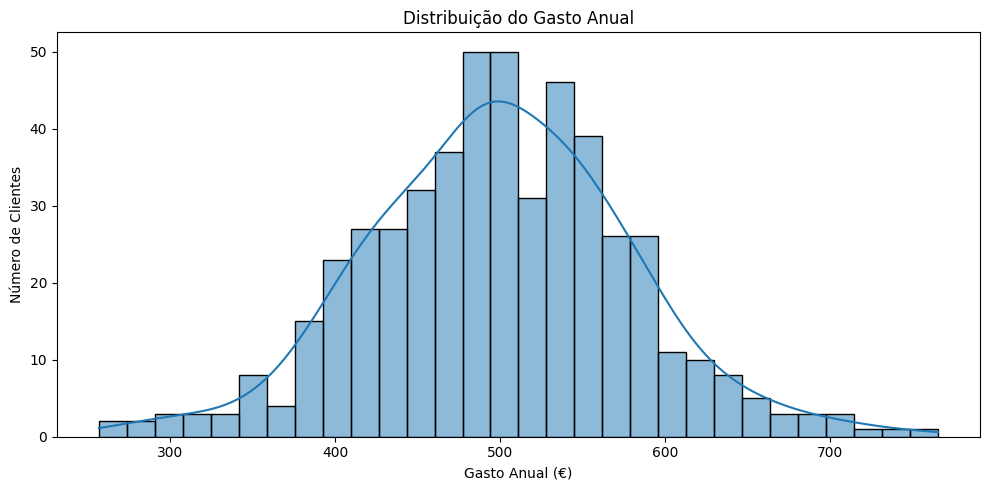

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df['YearlySpent'], bins=30, kde=True)
plt.title('Distribuição do Gasto Anual')
plt.xlabel('Gasto Anual (€)')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

Relação entre tempo na App e valor gasto

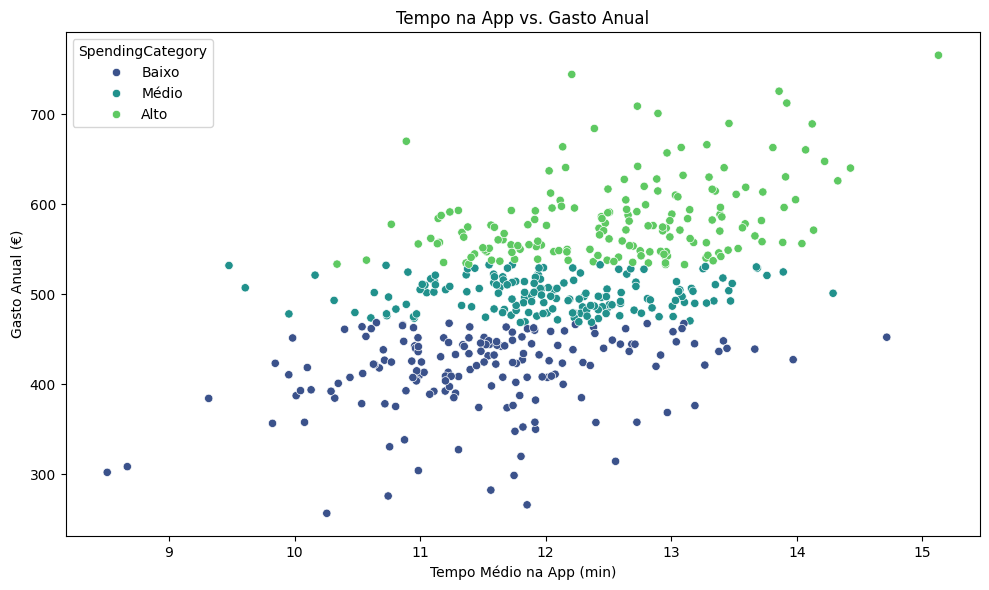

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TimeOnApp', y='YearlySpent', hue='SpendingCategory', palette='viridis')
plt.title('Tempo na App vs. Gasto Anual')
plt.xlabel('Tempo Médio na App (min)')
plt.ylabel('Gasto Anual (€)')
plt.tight_layout()
plt.show()

Relação entre tempo no Website e valor gasto

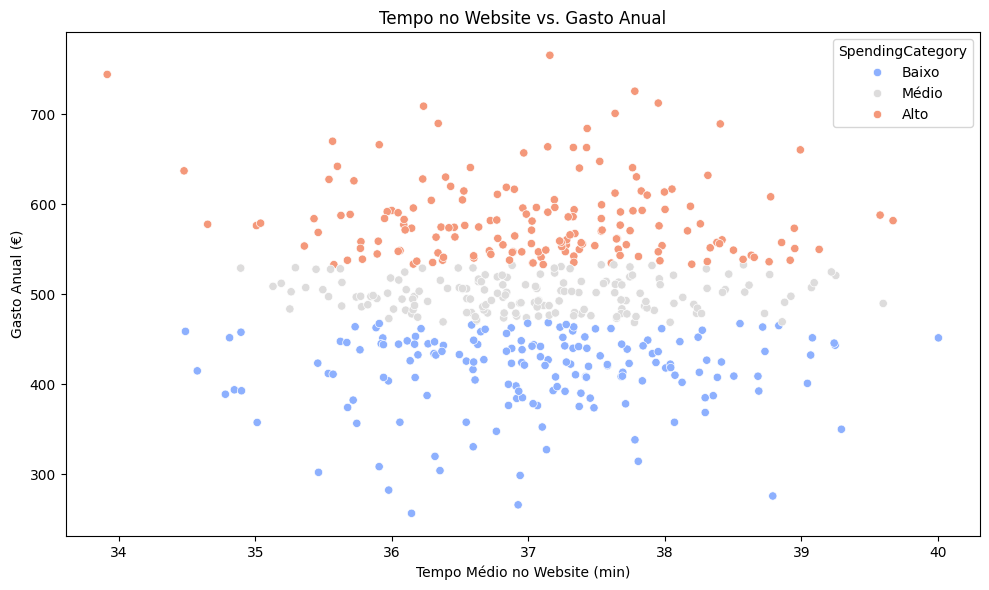

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TimeOnWebsite', y='YearlySpent', hue='SpendingCategory', palette='coolwarm')
plt.title('Tempo no Website vs. Gasto Anual')
plt.xlabel('Tempo Médio no Website (min)')
plt.ylabel('Gasto Anual (€)')
plt.tight_layout()
plt.show()

Mapa de calor das correlações

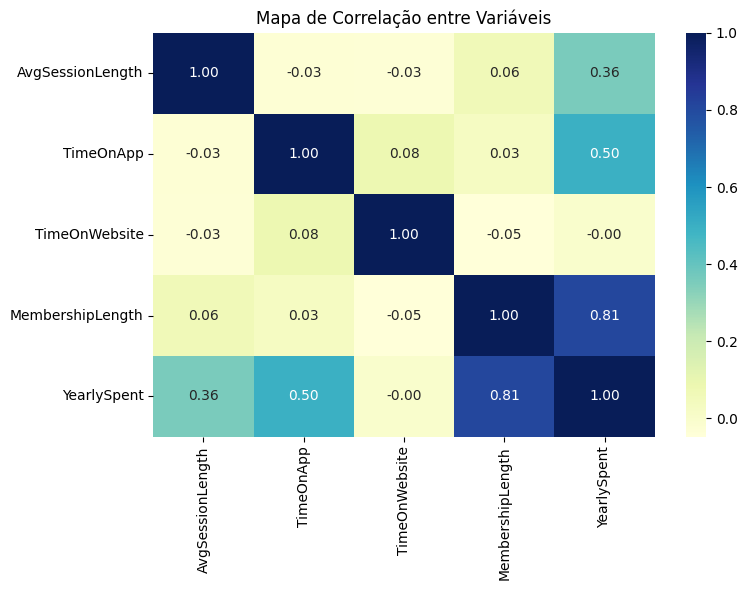

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

Boxplot do Gasto Anual por Categoria

C:\Users\jpedr\AppData\Local\Temp\ipykernel_26012\807648920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SpendingCategory', y='YearlySpent', palette='Set2')


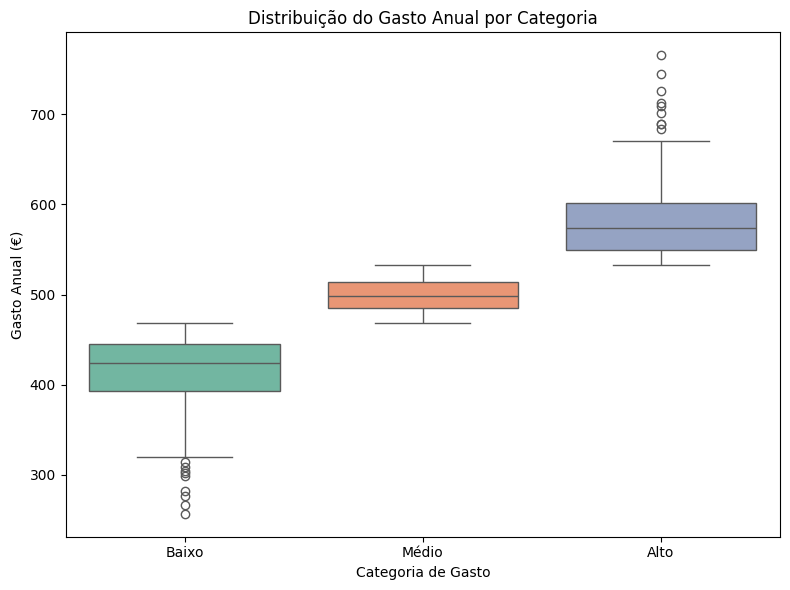

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='SpendingCategory', y='YearlySpent', palette='Set2')
plt.title('Distribuição do Gasto Anual por Categoria')
plt.xlabel('Categoria de Gasto')
plt.ylabel('Gasto Anual (€)')
plt.tight_layout()
plt.show()